In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
hosts_iguais = False
token_bucket = True
if hosts_iguais:
    sufixo = '_iguais'
else:
    sufixo = '_diferentes'
if token_bucket:
    sufixoRL = '_comRL'
    subtitulo = 'Usando TokenBucket'
else:
    sufixoRL = '_semRL'
    subtitulo = 'Nao usando TokenBucket'
#df = pd.read_table ("resultados"+sufixo+".txt", sep='\s+', index_col = [1, 0])
df = pd.read_table ("resultados_diferentes.txt", sep='\s+', index_col = [1, 0])


In [3]:
df

TxpacSlice1  RxpacSlice1  dropSlice1  TxpacSlice2  RxpacSlice2  \
RNG numHosts                                                                   
1   134-66        9690251      9674659       15592      4338966      4332980   
    67-33         6490411      6489389        1022      3631016      3630413   
    134-66        9690251      9674659       15592      4338966      4332980   
    267-133       9842112      9799019       43093      4802733      4781870   
    400-200       9802449      9732614       69835      4970960      4934727   
    534-266       9995203      9898019       97184      4860950      4814573   
    667-333       9640035      9522152      117883      5252092      5189174   
    800-400      10140611      9997973      142638      4786116      4716088   
2   67-33         6494870      6493806        1064      3345106      3344334   
    134-66        9291828      9276108       15720      3917846      3911645   
    267-133       9858669      9812235       46434      4907931      4884494   
    400-200       9783904      9710580       73324      5033388      4995225   
    534-266       9912048      9812827       99221      4935513      4887956   
    667-333       9998552      9878636      119916      4890665      4833242   
    800-400       9774509      9632595      141914      5144513      5074088   
3   67-33         6606457      6606180         277      3363206      3363144   
    134-66        9165653      9153757       11896      4369559      4362553   
    267-133      10068922     10025916       43006      4680415      4658955   
    400-200      10104665     10027595       77070      4721323      4686020   
    534-266       9915299      9817782       97517      4945268      4898343   
    667-333      10120295      9996725      123570      4769712      4710810   
    800-400       9895293      9749711      145582      5039040      4966293   
4   67-33         6934018      6932984        1034      3308246      3307772   
    134-66        8721654      8709475       12179      4804116      4797288   
    267-133       9959536      9914897       44639      4727622      4706126   
    400-200       9741908      9669284       72624      5066162      5029067   
    534-266       9928226      9830656       97570      4932359      4882668   
    667-333       9922783      9803621      119162      4961541      4904231   
    800-400       9770431      9625244      145187      5161560      5086674   

              dropSlice2  
RNG numHosts              
1   134-66          5986  
    67-33            603  
    134-66          5986  
    267-133        20863  
    400-200        36233  
    534-266        46377  
    667-333        62918  
    800-400        70028  
2   67-33            772  
    134-66          6201  
    267-133        23437  
    400-200        38163  
    534-266        47557  
    667-333        57423  
    800-400        70425  
3   67-33             62  
    134-66          7006  
    267-133        21460  
    400-200        35303  
    534-266        46925  
    667-333        58902  
    800-400        72747  
4   67-33            474  
    134-66          6828  
    267-133        21496  
    400-200        37095  
    534-266        49691  
    667-333        57310  
    800-400        74886

In [4]:
df["%dropTotalS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
df["%dropTotalS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice1"]+row["TxpacSlice2"]), axis=1)
#df
df["%dropS1"] = df.apply (lambda row: 100 * (float)(row["dropSlice1"]) / (row["TxpacSlice1"]), axis=1)
df["%dropS2"] = df.apply (lambda row: 100 * (float)(row["dropSlice2"]) / (row["TxpacSlice2"]), axis=1)

In [5]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

In [6]:
if hosts_iguais:
    df = df.query("numHosts != '50-50'")
else:
    #df = df.query("numHosts != '33-67'" or "numHosts != '67-33'" or "numHosts != '20-80'")
    df = df.query("numHosts != '20-80'")
gpb = df.groupby (["numHosts"])

,dropSlice1,dropSlice2
numHosts,,
134-66,14195.80,6401.40
267-133,44293.00,21814.00
400-200,73213.25,36698.50
534-266,97873.00,47637.50
667-333,120132.75,59138.25
67-33,849.25,477.75
800-400,143830.25,72021.50


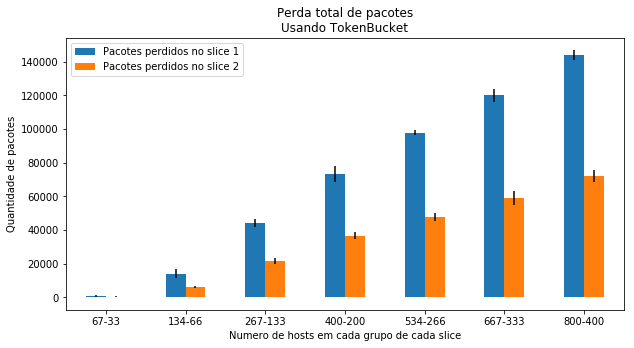

In [7]:
media = gpb.mean()
err = gpb.aggregate(confinterval)
err = err.filter(items=['dropSlice1', 'dropSlice2'])
media = media.filter(items=['dropSlice1', 'dropSlice2'])
display (media)
#display (err)

media.sort_values(by=["dropSlice1"]).plot (kind='bar', yerr=err, title="Perda total de pacotes\n"+subtitulo, rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('Quantidade de pacotes')
plt.gca().legend(('Pacotes perdidos no slice 1','Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'.pdf')

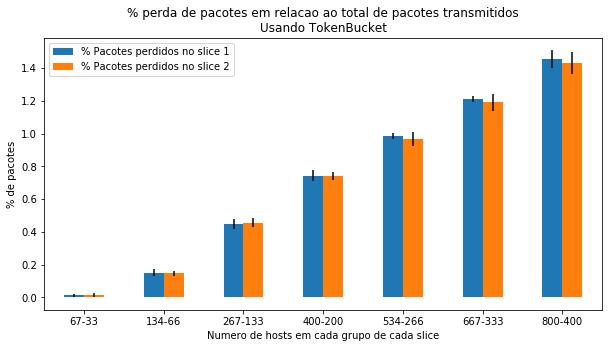

In [8]:
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropS1', '%dropS2'])
media = media.filter(items=['%dropS1', '%dropS2'])

media.sort_values(by=["%dropS1"]).plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes transmitidos\n"+subtitulo , rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'_porcentagem.pdf')

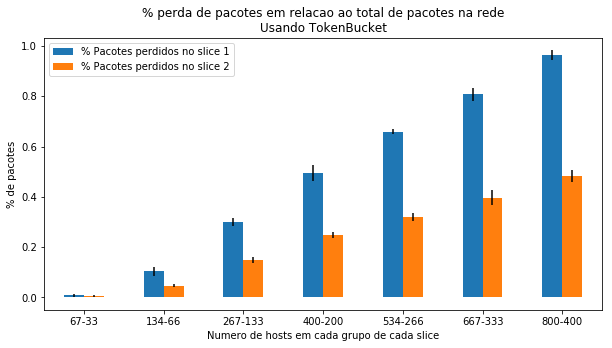

In [9]:
#Grafico em relação ao total
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['%dropTotalS1', '%dropTotalS2'])
media = media.filter(items=['%dropTotalS1', '%dropTotalS2'])

media.sort_values(by=["%dropTotalS1"]).plot (kind='bar', yerr=err, title="% perda de pacotes em relacao ao total de pacotes na rede\n"+subtitulo, rot=360, figsize=(10,5))
plt.xlabel('Numero de hosts em cada grupo de cada slice')
plt.ylabel('% de pacotes')
plt.gca().legend(('% Pacotes perdidos no slice 1','% Pacotes perdidos no slice 2'))
plt.savefig('grafico_hosts'+sufixo+sufixoRL+'_porcentagemTotal.pdf')

In [10]:
#Graficos para cada RNG

#lista_rng = ['1', '2','3','4']
#for i in lista_rng:
#    g=df[df.index.get_level_values('RNG').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, RNG = " + i, logy=True)

In [11]:
#Graficos para cada numero de host

#lista_host = ['100-100','200-200','300-300','400-400','500-500','600-600']
#for i in lista_host:
#    g=df[df.index.get_level_values('numHosts').isin([i])].filter(items=['dropSlice1', 'dropSlice2'])
#    g.plot.bar(figsize=(20,10),title="Perda de pacotes, hosts = " + i)